# Задание

Подкинули монету N раз. Кол-во случаев, когда выпал орёл, на 10% больше, чем кол-во случаев, когда выпала решка.
При каком N мы можем сказать, что монета «нечестная» (орёл и решка выпадают с разной вероятностью)?

# Решение

In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

Для решения данной задачи я решил использовать доверительные интервалы, а также применить одновыборочный t-критерий Стьюдента. Данный статистический тест применяется для проверки нулевой гипотезы: $$H_0 : E(X) = m$$ о равенстве математического ожидания нашей выборки: $E(X)$ известному значению $m$.
Против альтернативной гипотезы: $$H_1 : E(X) \neq m$$


Расчет t-критерия Стьдента происходит по следующей формуле:
$${E(X) - m}\over{sd \over \sqrt{n}}$$
$sd$ - стандартное отклонение нашей выборки;
$n$ - количество элементов в выборке.
Т.к. подразумевается что "честная" монетка это та, у которой орел и решка выпадают с одинаковой вероятностью, то: $$m = 0.5$$
Математическое ожидание нашей выбрки должно равняться: $$E(X) = 0.55$$ т.к. в условии указано, что орел выпадает на 10% больше, чем решка. 


Далее, берём вероятность получить такое значение t-критерия (p-value) и сравниваем это значение с заранее выбраным порогом. В данной задаче я решил выбрать порог $p < 0.05$.

*Интерпретировать результаты можно следующим образом*: допустив, что нулевая гипотеза верна, мы можем рассчитать, насколько велика вероятность получить t-критерий, равный или превышающий то реальное значение, которое мы рассчитали по имеющимся выборочным данным. Если эта вероятность оказывается меньше, чем заранее принятый уровень значимости  $p<0.05$, мы вправе отклонить проверяемую нулевую гипотезу.

Также для наглядности построим $95\%$ доверительный интервал

При количестве подбрасываний равном  400  можно сказать что монета "нечестная" c вероятностью больше 95%
Доверительный интервал :  0.5012465114550304  < m >  0.5987534885449697
Значение p-value:  0.04536371568709338 < 0.05


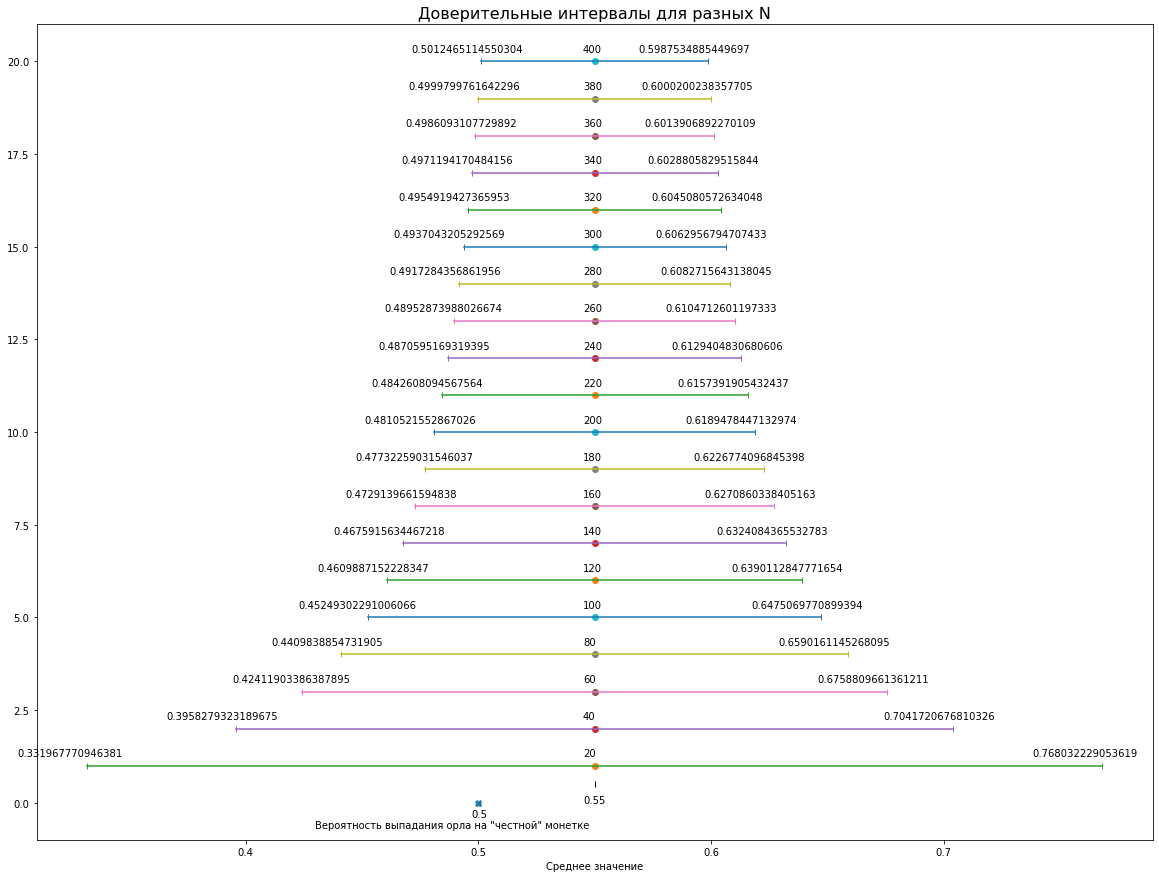

In [590]:
# Вероятность выпадания орла на "честонй" монетке 
mean_0 = 0.5
# Определение точности доверительного интервала
# т.к. доверительный интервал двусторонний то alpha/2.5%, поэтому значение в функции 0.975
ppf = scipy.stats.norm.ppf(0.975)

# Построение графика и основных подписей
point = 0
fig, ax = plt.subplots(figsize=(20, 15))
plt.plot((0.5), (0), 'X')
plt.plot(0.55, 0.5, '|', c='black')
plt.title('Доверительные интервалы для разных N', size=16)
plt.text(0.497, -0.4, str(0.5))
plt.text(0.43, -0.7, 'Вероятность выпадания орла на "честной" монетке')
plt.text(0.545, 0, str(0.55))
ax.set_xlabel('Среднее значение')

# Перебираем различные значения орлов и решек (О/Р)
try:
    for x in range(1000):
        for y in range(1000):
            a = np.concatenate((np.zeros(x), np.ones(y)))
            mean = np.mean(a)
#           Проверка, что количество выпадения О на 10% больше чем Р
            if mean==0.55:
#               Построение доверительных интервалов  
                se = np.std(a)/np.sqrt(len(a))
                mean_min = (mean - se * ppf) 
                mean_max = (mean + se * ppf)
                
                point += 1
                plt.plot(mean, point, 'o')
                plt.plot((mean_min, mean_max), (point, point), '-|')
#               Подписи к точкам на графике
                plt.text(mean_min-0.03, point+0.25, str(mean_min))
                plt.text(mean_max-0.03, point+0.25, str(mean_max))
#               Для удобства над каждым доверительным интервалом указано количесвто подбрасываний монетки
                plt.text(0.545, point+0.25, str(len(a)))
                stat, p = scipy.stats.ttest_1samp(a, 0.5)
#               Проверка p-value
                if (p < 0.05):
                    raise Exception()
                    
except:
    print('При количестве подбрасываний равном ', len(a), ' можно сказать что монета "нечестная" c вероятностью больше 95%' )
    print('Доверительный интервал : ', mean_min, ' < m > ', mean_max)
    print('Значение p-value: ', p, '< 0.05')

# Ответ

###### С помщью одностороннего t-критерия Стьюдента и построения доверительных интервалов выявлено, что, если подбросить монету 400 раз и при этом кол-во орлов больше, чем кол-во решек на 10%, то с вероятностью больше 95% монетка "НЕчестная"(орёл и решка выпадают с разной вероятностью).